# Salmonella Typhimurium worldwide population analysis

In [3]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
from matplotlib.pyplot import figure
from PIL import Image
import io
pd.set_option('display.max_columns', 300)
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
# Import MLST output 
file1 = 'salmonellast_output.csv'
data1 = pd.read_csv(file1, header=0, na_values='Nothing')
# Select columns
sel_cols = ['FILE', 'SCHEME', 'ST', 'aroC', 'dnaN', 'hemD', 'hisD', 'purE', 'sucA', 'thrA']
data2 = data1[sel_cols]
# Split the SRR id column
data2['id'] = data2['FILE'].str.split('.').str[0]
# Subset data2 to get the columns we need
sel_columns = ['ST', 'aroC', 'dnaN', 'hemD', 'hisD', 'purE', 'sucA', 'thrA', 'id']
data3 = data2[sel_columns]
d4 = data3[(data3['ST'] == '19') | (data3['ST'] == '34')]

In [5]:
# Import SISTR data
file2 = 'sistr_all.csv'
data4 = pd.read_csv(file2, header=0, na_values='Nothing', sep=",")
# Change genome column label to id
data4 = data4.rename(columns={"genome": "id"})

In [6]:
# Merge all datasets based on SRR id
data5 = pd.merge(data3, data4, on = 'id')

In [7]:
# Import BAPS group1-20 output 
file3 = 'roary_output_gr1.fastbaps_l6.csv'
file4 = 'roary_output_gr2.fastbaps_l6.csv'
file5 = 'roary_output_gr3.fastbaps_l6.csv'
file6 = 'roary_output_gr4.fastbaps_l6.csv'
file7 = 'roary_output_gr5.fastbaps_l6.csv'
file8 = 'roary_output_gr6.fastbaps_l6.csv'
file9 = 'roary_output_gr7.fastbaps_l6.csv'
file10 = 'roary_output_gr8.fastbaps_l6.csv'
file11 = 'roary_output_gr9.fastbaps_l6.csv'
file12 = 'roary_output_gr10.fastbaps_l6.csv'
file13 = 'roary_output_gr11.fastbaps_l6.csv'
file14 = 'roary_output_gr12.fastbaps_l6.csv'
file15 = 'roary_output_gr13.fastbaps_l6.csv'
file16 = 'roary_output_gr14.fastbaps_l6.csv'
file17 = 'roary_output_gr15.fastbaps_l6.csv'
file18 = 'roary_output_gr16.fastbaps_l6.csv'
file19 = 'roary_output_gr17.fastbaps_l6.csv'
file20 = 'roary_output_gr18.fastbaps_l6.csv'
file21 = 'roary_output_gr19.fastbaps_l6.csv'
file22 = 'roary_output_gr20.fastbaps_l6.csv'

# Read the data
data6 = pd.read_csv(file3, header=0, na_values='Nothing')
data7 = pd.read_csv(file4, header=0, na_values='Nothing')
data8 = pd.read_csv(file5, header=0, na_values='Nothing')
data9 = pd.read_csv(file6, header=0, na_values='Nothing')
data10 = pd.read_csv(file7, header=0, na_values='Nothing')
data11 = pd.read_csv(file8, header=0, na_values='Nothing')
data12 = pd.read_csv(file9, header=0, na_values='Nothing')
data13 = pd.read_csv(file10, header=0, na_values='Nothing')
data14 = pd.read_csv(file11, header=0, na_values='Nothing')
data15 = pd.read_csv(file12, header=0, na_values='Nothing')
data16 = pd.read_csv(file13, header=0, na_values='Nothing')
data17 = pd.read_csv(file14, header=0, na_values='Nothing')
data18 = pd.read_csv(file15, header=0, na_values='Nothing')
data19 = pd.read_csv(file16, header=0, na_values='Nothing')
data20 = pd.read_csv(file17, header=0, na_values='Nothing')
data21 = pd.read_csv(file18, header=0, na_values='Nothing')
data22 = pd.read_csv(file19, header=0, na_values='Nothing')
data23 = pd.read_csv(file20, header=0, na_values='Nothing')
data24 = pd.read_csv(file21, header=0, na_values='Nothing')
data25 = pd.read_csv(file22, header=0, na_values='Nothing')

# Create a new column for all datasets to identify the subsetted dataset 
data6['data_set'] = 'subset_1'
data7['data_set'] = 'subset_2'
data8['data_set'] = 'subset_3'
data9['data_set'] = 'subset_4'
data10['data_set'] = 'subset_5'
data11['data_set'] = 'subset_6'
data12['data_set'] = 'subset_7'
data13['data_set'] = 'subset_8'
data14['data_set'] = 'subset_9'
data15['data_set'] = 'subset_10'
data16['data_set'] = 'subset_11'
data17['data_set'] = 'subset_12'
data18['data_set'] = 'subset_13'
data19['data_set'] = 'subset_14'
data20['data_set'] = 'subset_15'
data21['data_set'] = 'subset_16'
data22['data_set'] = 'subset_17'
data23['data_set'] = 'subset_18'
data24['data_set'] = 'subset_19'
data25['data_set'] = 'subset_20'

In [8]:
# Merge multiple datasets
dfs = [data6, data7, data8, data9, data10, data11, data12, data13, data14, data15, data16, data17,
      data18, data19, data20, data21, data22, data23, data24, data25]
# Merge multiple datasets together
data26 = pd.concat(dfs)
# Change the column name Isolates to id
data26 = data26.rename(columns = {'Isolates': 'id'})
# Merging MLST and BAPS data based on ids
data27 = pd.merge(data5, data26, on = 'id')

In [9]:
# Let's filter based on Typhimurium and Typhimurium/Monophasic
data28 = data27[(data27['serovar'] == 'Typhimurium') | (data27['serovar'] == 'I 4,[5],12:i:-')]
# Now let's make sure that all three columns above agree in the serovar call
# Create a list containing the conditions to be checked
conditions = [
    (data28['serovar'] == 'Typhimurium') & (data28['serovar_antigen'] == 'Typhimurium') & (data28['serovar_antigen'] == 'Typhimurium'),
    (data28['serovar'] == 'I 4,[5],12:i:-') & (data28['serovar_antigen'] == 'I 4,[5],12:i:-') & (data28['serovar_antigen'] == 'I 4,[5],12:i:-')]
# Create a list of choices to be made (Typhimurium = 0, and I 4,[5],12:i:- = 1)
choices = ['Biphasic', 'Monophasic']
# Use numpy to do the selection
data28['serovar_call'] = np.select(conditions, choices, default= 'Neither') #default 2 here is if it does come out as either 0 or 1
# Filter out serovar_call classified as 0 or 1
data29 = data28[data28['serovar_call'] != 'Neither']
# Filtering important columns 
variablesNeeded = ['ST', 'cgmlst_ST', 'serovar_call', 'Level 1', 'Level 2', 'Level 3', 'Level 4', 'Level 5', 'Level 6', 'data_set']
# Filter columns
data30 = data29[variablesNeeded]
# Renaming level columns appropriately
bapsNames = {'Level 1': 'Baps1', 'Level 2': 'Baps2', 'Level 3': 'Baps3', 'Level 4': 'Baps4', 'Level 5': 'Baps5', 'Level 6': 'Baps6'}
data30 = data30.rename(columns = bapsNames)

<ipython-input-9-a420bad2e546>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data28['serovar_call'] = np.select(conditions, choices, default= 'Neither') #default 2 here is if it does come out as either 0 or 1


# PLOTS

<ipython-input-10-a4f2e01f6c02>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  st_sample['ST'] = st_sample['ST'].replace('-', np.nan)
<ipython-input-10-a4f2e01f6c02>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["cgmlst_ST"] = b["cgmlst_ST"].astype('int')


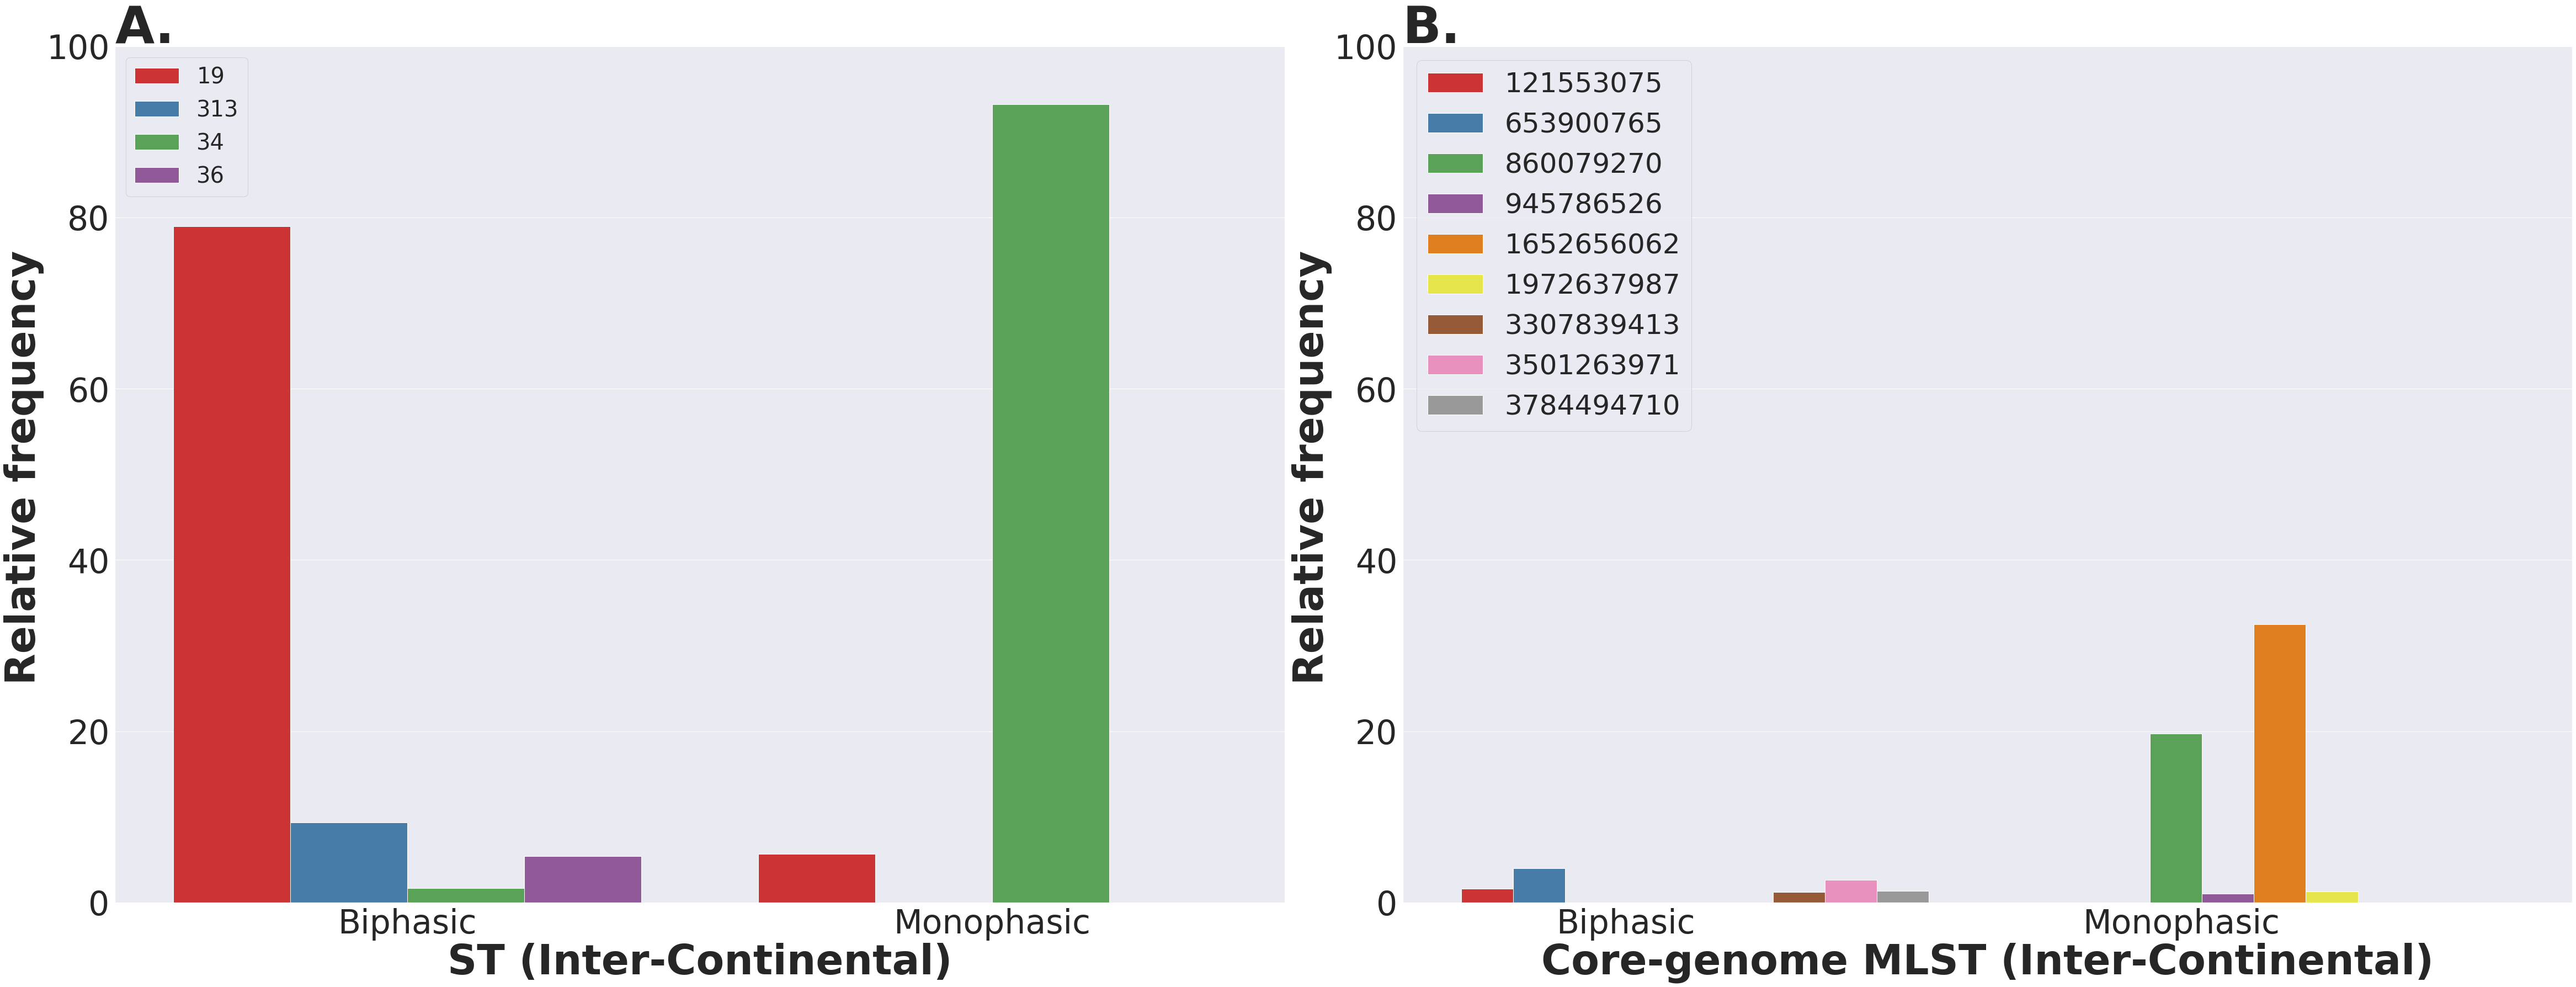

In [10]:
# Set background and number of subplots 

_ = sns.set(style="darkgrid")
fig, ax = plt.subplots(1, 2, figsize=(65, 25))

# Remove default tick marks and labels 

plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])

############################################################################################################

# Plot the ST distribution (We are filtering relative frequencies >= 1%)

ax1 = fig.add_subplot(1, 2, 1)
_ = sns.set_palette('Set1', 10)

st_sample = data30[['serovar_call', 'ST']]
st_sample['ST'] = st_sample['ST'].replace('-', np.nan)
st_sample = st_sample.dropna(axis = 0, how = 'any')
a = st_sample.groupby('serovar_call')['ST'].value_counts(normalize = True)*100
a = a.to_frame()
a.columns = ['percent']
a = a.reset_index()
b = a[a['percent'] >= 1]

_ = sns.barplot(x = 'serovar_call', y= 'percent', hue = 'ST', data = b)
_ = ax1.set_xlabel('ST (Inter-Continental)', fontsize = 74, weight = 'bold')
_ = ax1.set_ylabel(' Relative frequency', fontsize = 74, weight = 'bold')
_ = ax1.tick_params(axis = 'x', which = 'major', labelsize = 60, labelrotation = 0)
_ = ax1.tick_params(axis = 'y', which = 'major', labelsize = 60)
_ = ax1.set_ylim([0,100])
_ = ax1.set_title('A.', fontsize = 92, weight = 'bold', loc = 'left')
plt.legend(fontsize = 40)

##############################################################################################################

# Plot the core-genome MLST distribution (We are filtering relative frequencies >= 1%)

ax2 = fig.add_subplot(1, 2, 2)
_ = sns.set_palette('Set1', 30)

cst_sample = data30[['serovar_call', 'cgmlst_ST']].dropna(axis = 0, how = 'any')
a = cst_sample.groupby('serovar_call')['cgmlst_ST'].value_counts(normalize = True)*100
a = a.to_frame()
a.columns = ['percent']
a = a.reset_index()
b = a[a['percent'] >= 1]
b["cgmlst_ST"] = b["cgmlst_ST"].astype('int')

_ = sns.barplot(x = 'serovar_call', y= 'percent', hue = 'cgmlst_ST', data = b)
_ = ax2.set_xlabel('Core-genome MLST (Inter-Continental)', fontsize = 74, weight = 'bold')
_ = ax2.set_ylabel(' Relative frequency', fontsize = 74, weight = 'bold')
_ = ax2.tick_params(axis = 'x', which = 'major', labelsize = 60, labelrotation = 0)
_ = ax2.tick_params(axis = 'y', which = 'major', labelsize = 60)
_ = ax2.set_ylim([0,100])
_ = plt.xticks(horizontalalignment='right')
_ = ax2.set_title('B.', fontsize = 92, weight = 'bold', loc = 'left')
plt.legend(fontsize = 50, loc='upper left')


# Put a tight layout to organize the panel display evenly

_ = fig.tight_layout()

# Save figure 

#plt.savefig('Figure6.png', bbox_inches='tight')

# Save the image in memory in PNG format
png1 = io.BytesIO()
fig.savefig(png1, format="png")

# Load this image into PIL
png2 = Image.open(png1)

# Save as TIFF
png2.save("Figure_5.tiff")
png1.close()

**Figure 5.** **Inter-continental distribution of *Salmonella* Typhimurium STs and core-genome MLSTs.**. 
(A-B) Relative frequencies of STs and core-genome MLSTs between Monophasic and Biphasic populations across multiple continents (STs and core-genome MLSTs with proportion below 1% were excluded from the graph). The initial number of genomes used as an input was 23,045, while these analyses were run with 21,534 genomes that passed the filtering steps. Raw sequences were downloaded from NCBI SRA without filtering for USA isolates exclusively. Hence, the name “Inter-Continental”. However, we cannot break the data down into continents, because the metadata was unreliable.